## Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1 - Read the dataset.

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

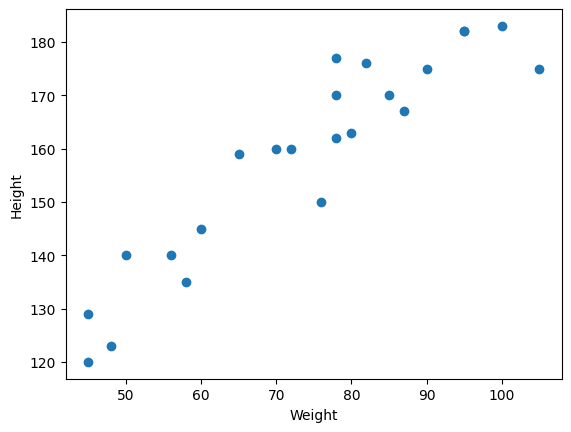

In [4]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

### Step 2 - EDA, FE.

In [5]:
df.shape

(23, 2)

In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

### Step 3 - Divide our dataset into independent and dependent featers.

In [8]:
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [9]:
X.shape, y.shape

((23, 1), (23,))

### Step 4 - Divide the dataset into test and train.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

In [12]:
X_test.shape, X_train.shape

((5, 1), (18, 1))

In [13]:
y_train.shape, y_test.shape

((18,), (5,))

### Step 5 - Standard Scaling on the test and train data.

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [20]:
X_test

array([[ 0.12105207],
       [-1.10809199],
       [ 0.12105207],
       [ 0.0093117 ],
       [-1.72266402]])

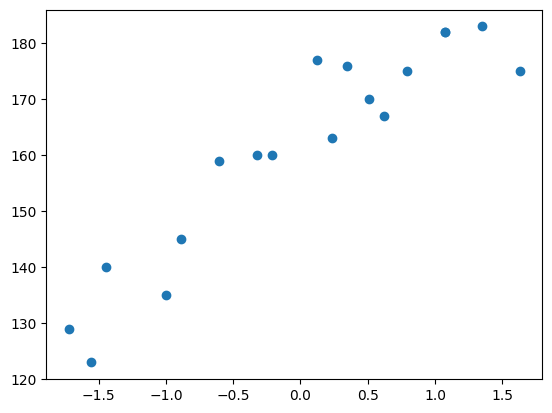

In [21]:
plt.scatter(X_train, y_train)

### Step 6 - Model Training.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [25]:
## Train the train dataset.

regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
regressor.intercept_

161.16666666666666

In [27]:
regressor.coef_

array([17.26854281])

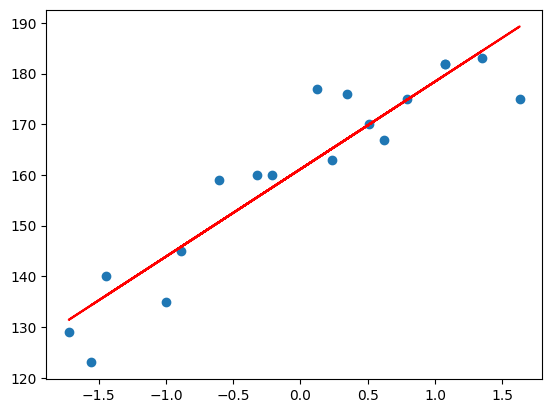

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

### prediction of train data
1. predicted height output = intercept +coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### prediction of test data
1. predicted height output = intercept +coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

In [31]:
## prediction for test data.

y_prid_test = regressor.predict(X_test)

In [32]:
y_prid_test

array([163.25705945, 142.0315327 , 163.25705945, 161.32746611,
       131.41876933])

In [33]:
y_test

5     162
21    140
9     170
18    150
0     120
Name: Height, dtype: int64

### Step 7 - Performance Matrix MAE, MSE, RMSE.

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
mse = mean_squared_error(y_test, y_prid_test)
mae = mean_absolute_error(y_test, y_prid_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

61.9748704619776
6.555553628717592
7.872411985025784


### Accuracy of model R-Squared and Adjusted R-Squared.
### R-Squared.

Formula.

**R^2 = 1 - SSR/SST**
- R^2 = Accuracy of the model
- SSR = sum of square of residual
- SST = total sum of square


In [36]:
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test, y_prid_test)
score

0.797626467927189

### Adjusted R-Squared.
**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where:

- R2 = the R2 of model
- n = number of observation
- k = the number of predictor variables

In [40]:
# display adjusted R-Squared

1 - (1-score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7301686239029188

In [42]:
scaler

StandardScaler()

In [43]:
regressor

LinearRegression()